In [1]:
import pymc3 as pm
import numpy as np
from datetime import datetime
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
np.random.seed(101)

In [3]:
start = datetime(2002, 11, 15)
end = datetime(2002, 12, 31)

In [4]:
market = yf.Ticker('SPY').history(start=start,end=end)
stock = yf.Ticker('AAPL').history(start=start,end=end)
risk_free_rate = yf.Ticker('^TNX').history(start=start,end=end)

In [5]:
daily_returns = pd.DataFrame()

In [6]:
daily_returns['market'] = market['Close'].pct_change(1)*100
daily_returns['stock'] = stock['Close'].pct_change(1)*100

In [7]:
daily_returns['riskfree'] = (1 + risk_free_rate['Close'])**(1/360)-1

In [8]:
market.index.difference(risk_free_rate.index)

DatetimeIndex([], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)

In [9]:
# 欠損値埋め
daily_returns = daily_returns.ffill()

In [10]:
daily_returns = daily_returns.dropna()

In [11]:
daily_returns.isnull().sum()

market      0
stock       0
riskfree    0
dtype: int64

In [12]:
daily_returns.head()

,market,stock,riskfree
Date,,,
2002-11-18 00:00:00-05:00,-1.006479,-1.880820,0.004491
2002-11-19 00:00:00-05:00,-0.132662,-2.427886,0.004469
2002-11-20 00:00:00-05:00,2.224401,1.702383,0.004522
2002-11-21 00:00:00-05:00,1.862081,5.280163,0.004559
2002-11-22 00:00:00-05:00,-0.712112,-2.079408,0.004577


In [13]:
# 超過リターンを計算
y = daily_returns['stock'] - daily_returns['riskfree']
x = daily_returns['market'] - daily_returns['riskfree']

Text(0.5, 0, 'Exscess returns of S&P500')

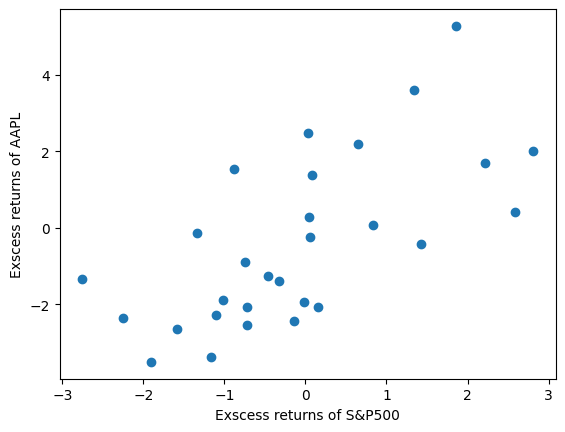

In [14]:
# プロット
plt.scatter(x,y)
plt.ylabel('Exscess returns of AAPL')
plt.xlabel('Exscess returns of S&P500')

(array([0.1177334 , 0.31395574, 0.15697787, 0.1177334 , 0.1177334 ,
        0.1177334 , 0.1177334 , 0.        , 0.03924447, 0.03924447]),
 array([-3.51105055e+00, -2.63238508e+00, -1.75371961e+00, -8.75054139e-01,
         3.61133041e-03,  8.82276800e-01,  1.76094227e+00,  2.63960774e+00,
         3.51827321e+00,  4.39693868e+00,  5.27560415e+00]),
 <BarContainer object of 10 artists>)

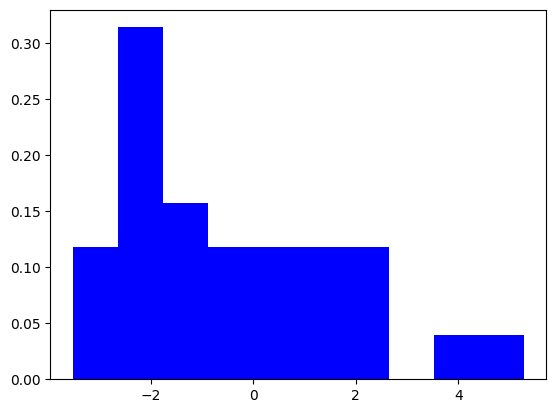

In [15]:
plt.hist(y, density=True, color='blue')

In [16]:
daily_returns.describe()

,market,stock,riskfree
count,29.000000,29.000000,29.000000
mean,-0.100078,-0.408497,0.004513
std,1.394661,2.190433,0.000066
min,-2.749089,-3.506526,0.004357
25%,-1.006479,-2.079408,0.004469
50%,-0.132662,-0.896996,0.004515
75%,0.656205,1.374343,0.004559
max,2.813509,5.280163,0.004622


In [ ]:
test_size = 10

x_train = x[:, -test_size]
y_train = x[:, -test_size]